# Лабораторная работа 1

Выполнил: Лабуткин Иван Алексеевич, группа 4144

## Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import time

## Анализ первого датасета

Первый датасет был взят с Kaggle - результаты химического анализа итальянского вина от 3 производителей
Датасет был выбран из-за небольшого числа объектов и удобных типов данных (все непрерывные)

In [2]:
wine=pd.read_csv('wine-clustering.csv', sep=',')
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.describe()#Краткое описание данных

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine.info()#Получение данных о пропусках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Пропусков нет

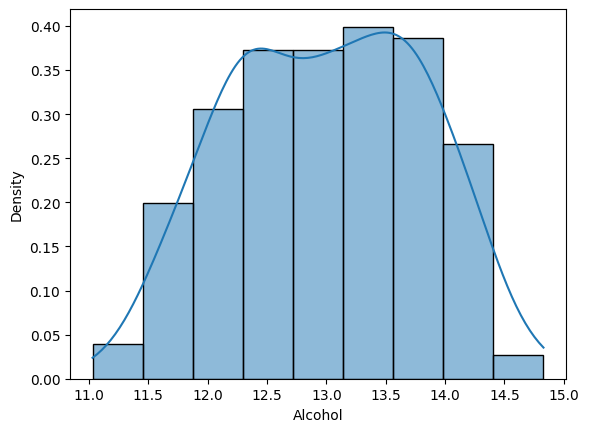

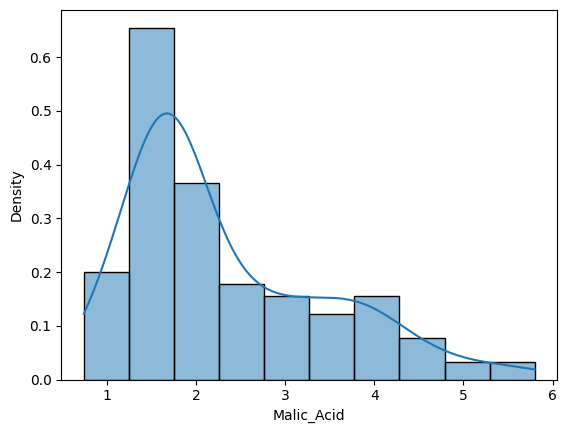

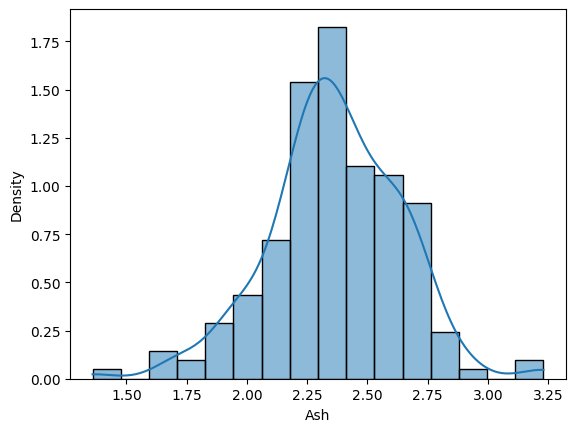

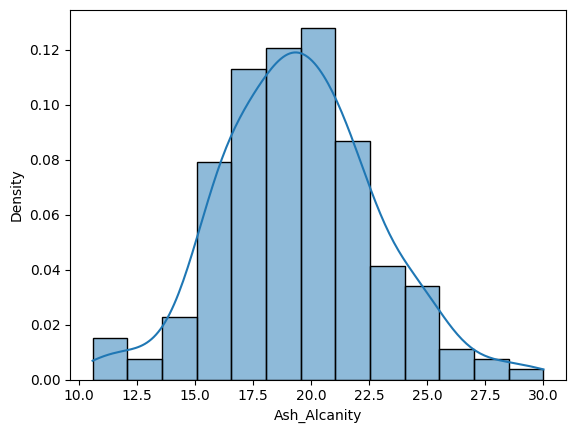

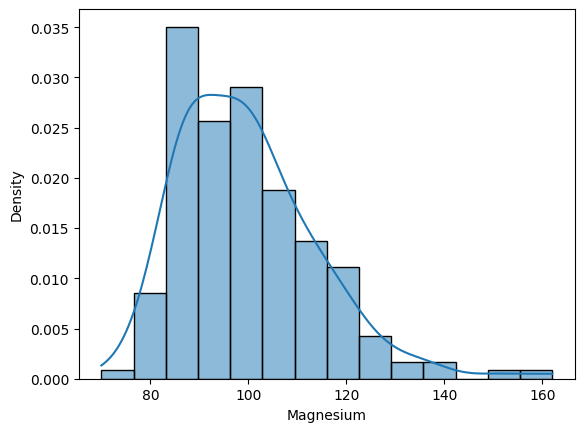

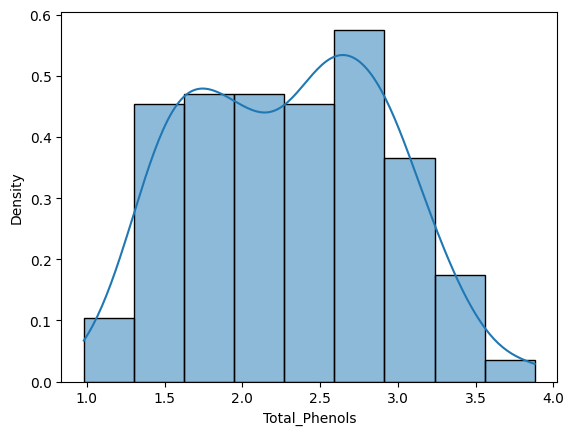

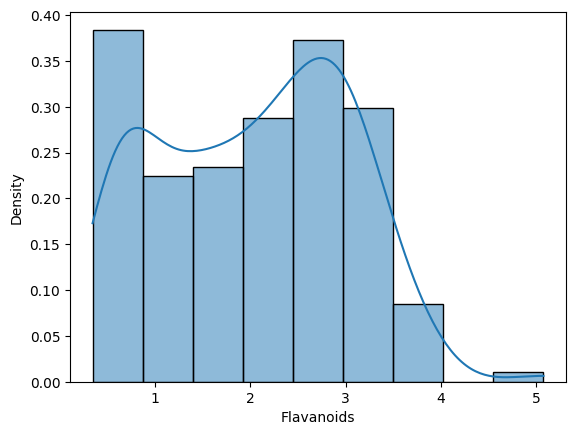

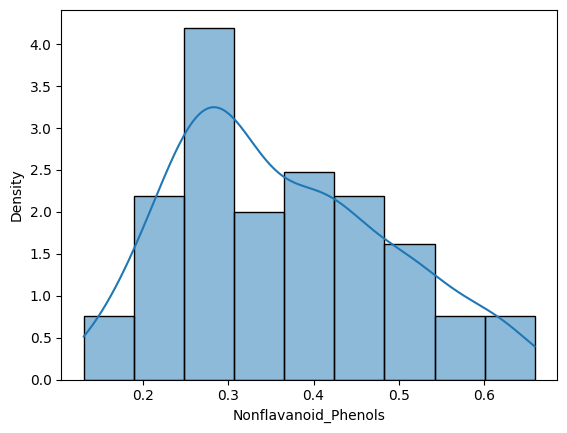

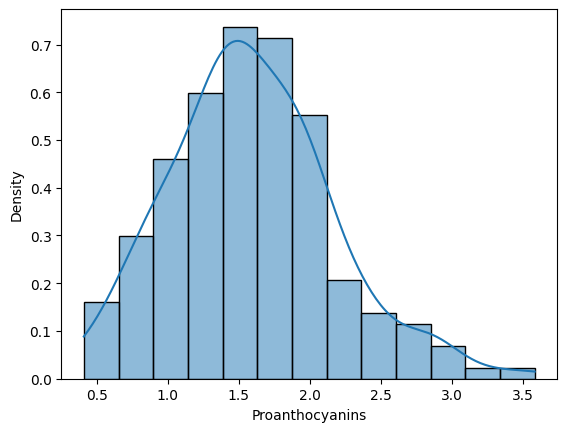

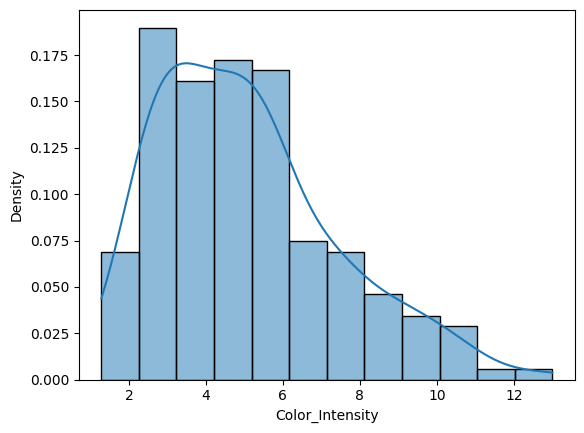

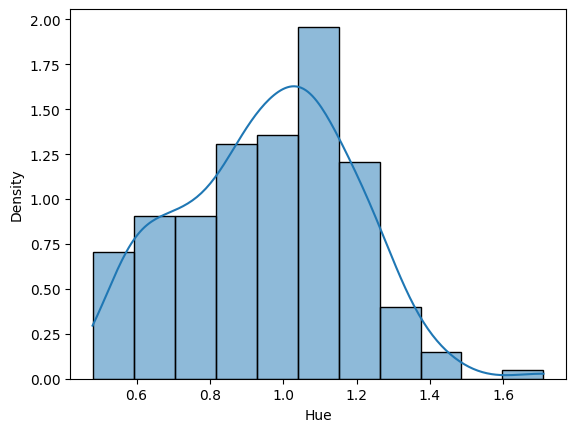

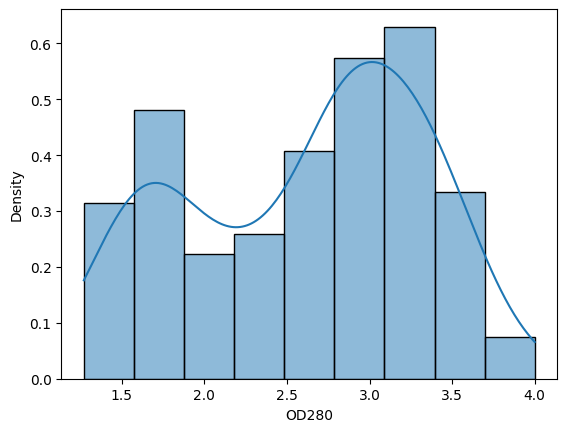

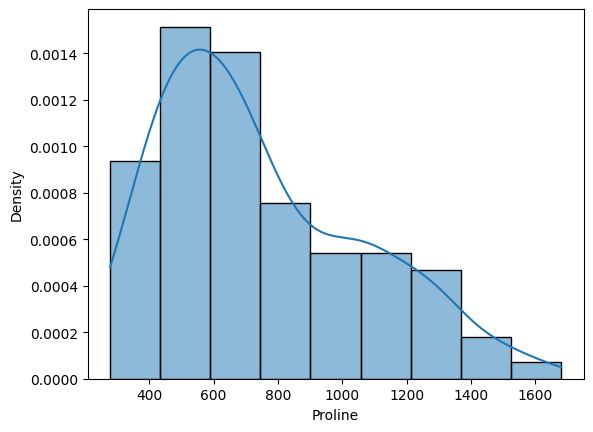

In [5]:
for i in wine.columns:
    plt.figure(i)
    sns.histplot(wine[i],kde=True,stat="density")
    plt.show()

Как таковых выбросов не наблюдается

Применим метод главных компонент для примерного понимания числа и структуры кластеров

In [6]:
from sklearn.decomposition import PCA

In [7]:
d=(wine-wine.mean())/wine.std()
d=d.to_numpy()#Стандартизация

In [8]:
pca = PCA(n_components=2)
y=pca.fit_transform(d)

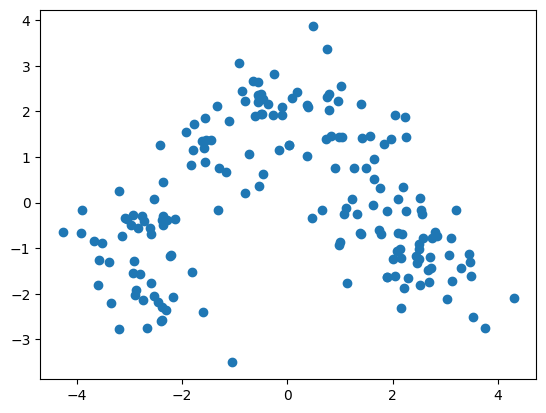

In [9]:
plt.scatter(y[:,0],y[:,1])
plt.show()

По графику можно заметить, что кластеров, скорее всего, 3. Их структура - кластеры с центром, возможно, соединённые перемычками

# Анализ второго датасета

Второй датасет также был взят с Kaggle, это данные об использовании кредитных карт потребителями, где собраны данные о средних лимитах кредитных карт, о числе карт, визитов в банк онлайн и оффлайн и о числе звонков в банки

Кластеризовав эти данные, можно найти основные группы поведения пользователей банковских услуг. Датасет был взят, поскольку все данные непрерывные, а число кластеров здесь не так очевидно, как в прошлом датасете

In [10]:
custs=pd.read_csv('Credit Card Customer Data.csv', sep=',')
custs

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [11]:
custs.describe()#Краткое описание данных

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [12]:
custs.info()#Получение данных о пропусках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Первые две колонки не несут смысла для кластеризации, поскольку являются идентификаторами. Их следует удалить

In [13]:
custs=custs.drop(['Sl_No', 'Customer Key'], axis=1)

In [14]:
c=(custs-custs.mean())/custs.std()
c=c.to_numpy()#Стандартизация

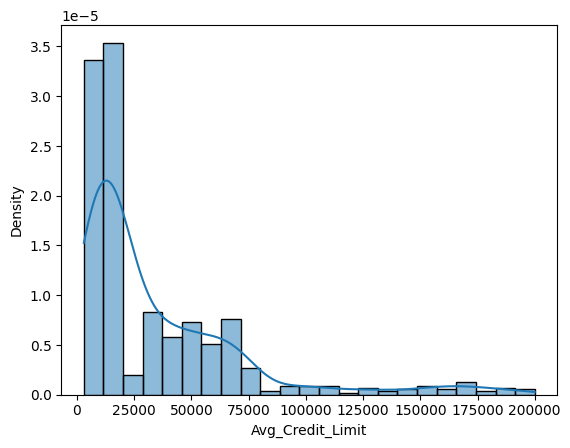

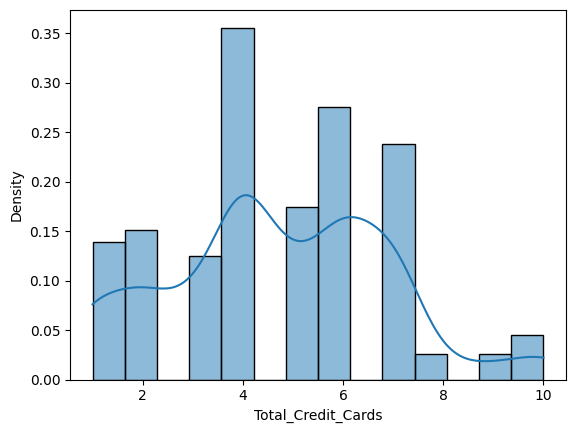

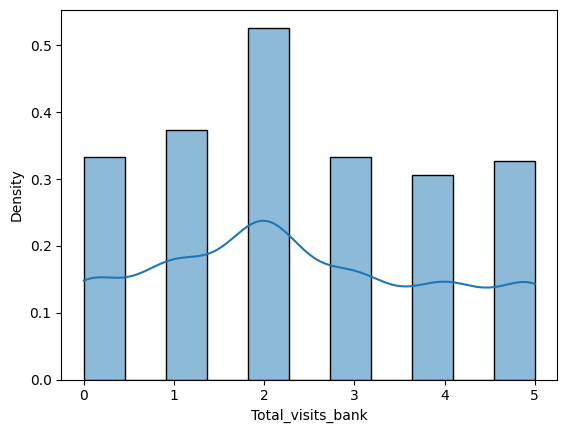

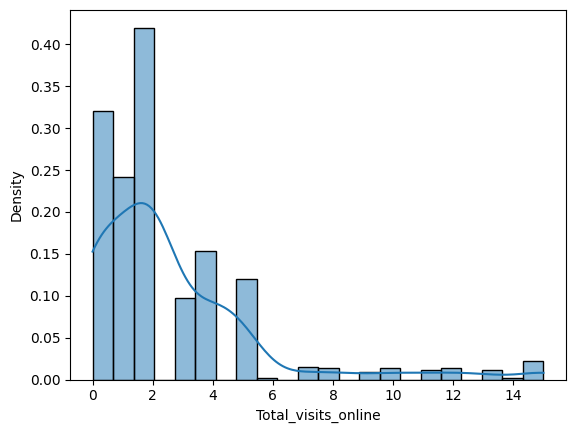

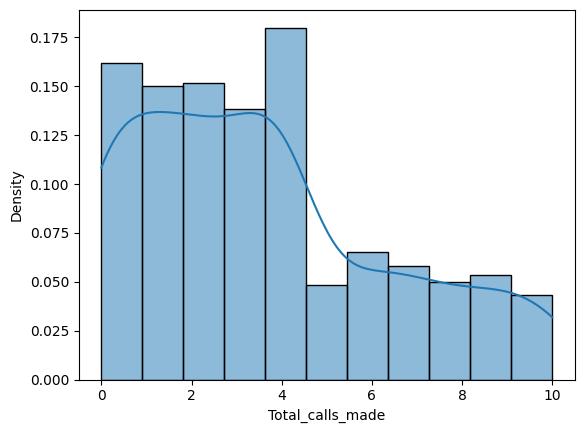

In [15]:
for i in custs.columns:
    plt.figure(i)
    sns.histplot(custs[i],kde=True,stat="density")
    plt.show()

Выбросов в данном случае также не наблюдается

In [16]:
pca = PCA(n_components=2)
y=pca.fit_transform(c)

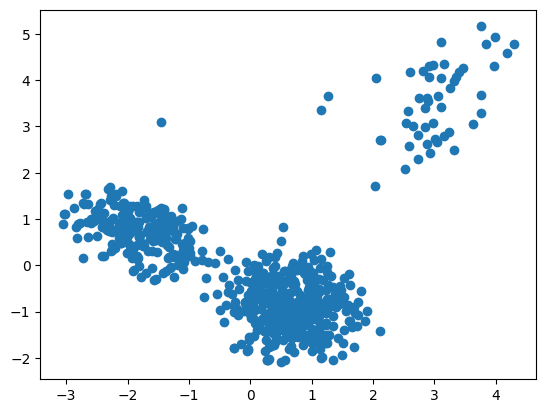

In [17]:
plt.scatter(y[:,0],y[:,1])
plt.show()

В данном случае очень хорошо выделяются 3 кластера: 2 из них очень плотные, третий - менее плотный. Есть несколько выбросов

# Иерархическая кластеризация

Вспомогательные функции для реализации класса иерархической кластеризации:

In [18]:
def euclide(x,y):#Расчёт евклидового расстояния между двумя точками
    return np.sqrt(np.sum(np.power(x-y,2)))

def standartize_data(data): #Стандартизация данных
    d=(data-data.mean())/data.std()
    return np.asmatrix(d)

def max_n(A,d, i_1,i_2):#Метод дальнего соседа
    m=-1
    for i in A[i_1]:
        for j in A[i_2]:
            t=euclide(d[i],d[j])
            if m<t:#Если нашелся сосед дальше, меняем максимальное расстояние
                m=t
    return m

def make_matrix(data, clusters):#Создание матрицы расстояний
    A=np.ones([len(clusters),len(clusters)])*100
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
                A[i,j]=max_n(clusters,data,i,j) 
    return A

def remake_matrix(m,i,j, clusters,data):#Пересчёт матрицы расстояний при измененении составов кластеров
    m=np.delete(m,j,0)#Удаление необходимых строки и столбца
    m=np.delete(m,j,1)
    for c in range(i):#Перерасчёт расстояний 
        m[c,i]=max_n(clusters,data,c,i)
    for c in range(i+1,m.shape[0]):
        m[i,c]=max_n(clusters,data,i,c)
    return m

Реализация класса иерархической кластеризации с рассчётом расстояния между кластерами методом дальнего соседа

In [19]:
class Hierarchical_clusterer():
    learning_history=[] #Объединяемые на каждой итерации кластеры
    clusts=[] #Состав кластеров на каждой итераыии
    average_between_clusters=[] #Среднее между кластерами
    dmatrix=[]#Матрица расстояний
    def fit(self,data): 
        e=[]
        d=standartize_data(data) #Стандартизация данных
        cl=np.arange(d.shape[0]).reshape((-1,1)).tolist() #Инициализация изначальных кластеров
        m=make_matrix(d, cl)#Создание матрицы расстояний
        self.dmatrix=m
        self.clusts=[]
        self.clusts.append(copy.deepcopy(cl))
        self.average_between_clusters.insert(0,np.mean(m, where=m !=100))
        for i in range(d.shape[0]-1):
            similar_clusters=[np.argmin(m)//m.shape[0],np.argmin(m)%m.shape[0]]#Запоминание координат ближайших друг к другу кластеров
            e.append([similar_clusters,np.min(m)])
            cl[similar_clusters[0]].extend(cl[similar_clusters[1]])#Обновление состава кластеров
            cl.pop(similar_clusters[1])
            self.average_between_clusters.insert(0,np.mean(m, where=m !=100))#Пересчёт среднего межкластерного расстояния
            if m.shape[0]!=1:
                m=remake_matrix(m,similar_clusters[0],similar_clusters[1],cl,d)#Пересчёт матрицы расстояний
            self.clusts.append(copy.deepcopy(cl))
        self.learning_history=e
        
    def draw_dendrogram(self):#Рисование дендрограммы
        dic={}#Словарь с координатами кластеров на плоскости
        clusts=self.clusts[-1][0]
        for i in range(len(clusts)):#Заполнение словаря
            dic[clusts[i]]=[i,0]
        fig=plt.figure(figsize = (20, 5))
        plt.xticks([i for i in range(len(clusts))],clusts, rotation=90) #Установка изначальных позиций кластеров
        for i in range(len(self.clusts[0])-1):
            #Рисование вертикальных линий на объединяемых на каждом из шагов кластеров, высота - расстояние между кластерами
            plt.vlines(x = dic.get(self.learning_history[i][0][0])[0], ymax=self.learning_history[i][1], ymin=dic.get(self.learning_history[i][0][0])[1], color = 'b')
            plt.vlines(x = dic.get(self.learning_history[i][0][1])[0], ymax=self.learning_history[i][1],ymin=dic.get(self.learning_history[i][0][1])[1], color = 'b')
            #Рисование горизонтальной линии между объединяемыми кластерами
            plt.hlines(xmin=dic.get(self.learning_history[i][0][0])[0], xmax=dic.get(self.learning_history[i][0][1])[0], y=self.learning_history[i][1])
            #Обновление координат кластеров
            dic.get(self.learning_history[i][0][0])[0], dic.get(self.learning_history[i][0][0])[1]=(dic.get(self.learning_history[i][0][0])[0]+dic.get(self.learning_history[i][0][1])[0])/2, self.learning_history[i][1]
            dic.pop(self.learning_history[i][0][1])
            #Обновление словаря
            for key in sorted(dic.keys()):
                if key>self.learning_history[i][0][1]:
                    dic[key-1] = dic.pop(key)
        plt.show()
    def predict(self,k): #Предсказание для k кластеров
        clusters=self.clusts[-k]#Нужный состав кластеров из истории
        pr=np.arange(len(self.clusts[-1][0])).tolist()
        for i,obj in enumerate(clusters):#Вывод результатов
            for j in obj:
                pr[j]=i
        return pr
    def show_average_between_clusters(self, k):
        return self.average_between_clusters[k-1]
    def show_average_inside_clusters(self,k):#Расчёт среднего межкластерного расстояния
        clusters=self.clusts[-k]
        dim=[]
        for obj in clusters:
            mn=np.array([])
            clust=sorted(obj)
            if len(clust)!=1:
                for i in range(len(clust)):
                    for j in range(i+1, len(clust)):
                        mn=np.append(mn, self.dmatrix[i,j])
                dim.append(np.mean(mn))
            else: dim.append(0)
        return dim
                

## Применение иерархической кластеризации для 1 датасета

In [26]:
hc=Hierarchical_clusterer()

In [27]:
start = time.time()
hc.fit(wine) #Обучение
end = time.time()

In [28]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 5157.203674316406 ms


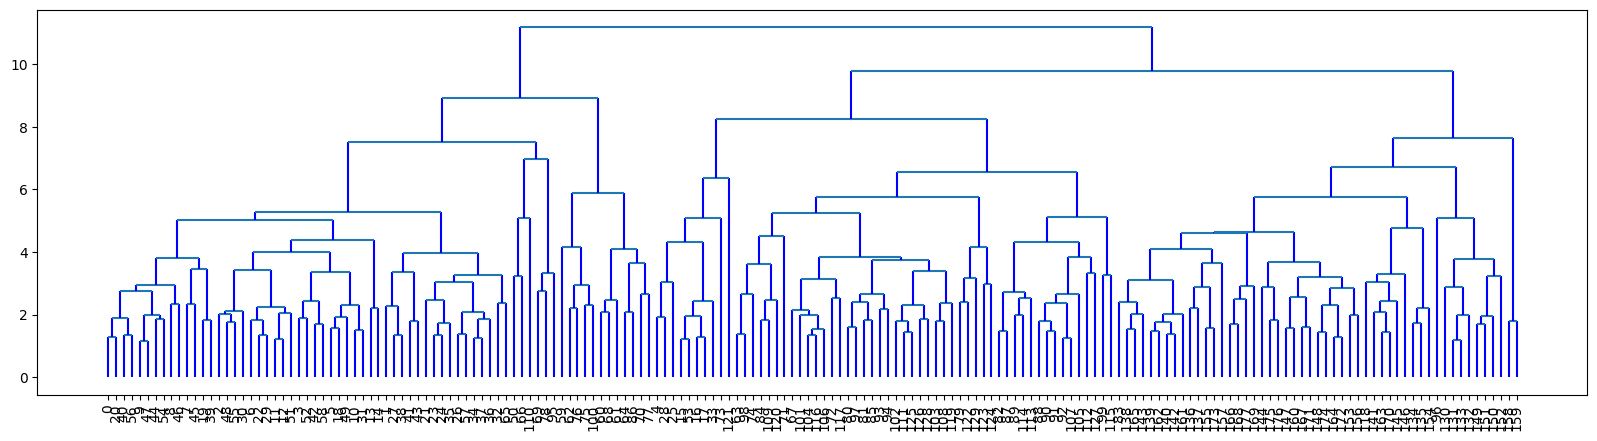

In [29]:
hc.draw_dendrogram()

Действительно, в данном случае очень хорошо выделяются 3 кластера

Сравним результаты с эталонной реализацией:

In [30]:
from sklearn.cluster import AgglomerativeClustering
d=standartize_data(wine)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete',compute_distances=True)

In [31]:
start = time.time()
cl=cluster.fit_predict(np.array(d))
end = time.time()

C:\Users\ilabu\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 7.000923156738281 ms


Для сравнения результатов используем матрицу сопряжённости:

In [33]:
p=pd.crosstab(index = np.array(hc.predict(3)), columns = cl)
p.index = ['Cluster 0', 'Cluster 1','Cluster 2']
p.columns = [ 'Cluster 0', 'Cluster 1','Cluster 2']
p

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,69,0,0
Cluster 1,0,58,0
Cluster 2,0,0,51


Результаты аналогичны, однако время выполнения реализации написанного алгоритма явно больше эталонного

Сравним построение дендрограммы с эталонной:

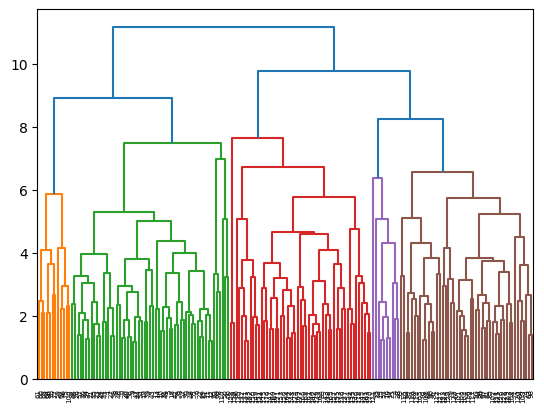

In [34]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(d, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)

Результаты абсолютно аналогичны

Рассмотрим метрики кластеризации:

In [36]:
print('Среднее межкластерное расстояние:', hc.show_average_between_clusters(3))
print('Средние внутрикластерные расстояния:', hc.show_average_inside_clusters(3))

Среднее межкластерное расстояние: 9.712871729132731
Средние внутрикластерные расстояния: [3.625646917404642, 3.0903368397166036, 3.1707508867330927]


Поскольку результаты аналогичны, то метрики на эталонной реализации будут точно такими же

## Иерархическая кластеризация для второго датасета

In [37]:
h=Hierarchical_clusterer()

In [38]:
start = time.time()
h.fit(custs) #Обучение
end = time.time()

In [39]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 85497.49660491943 ms


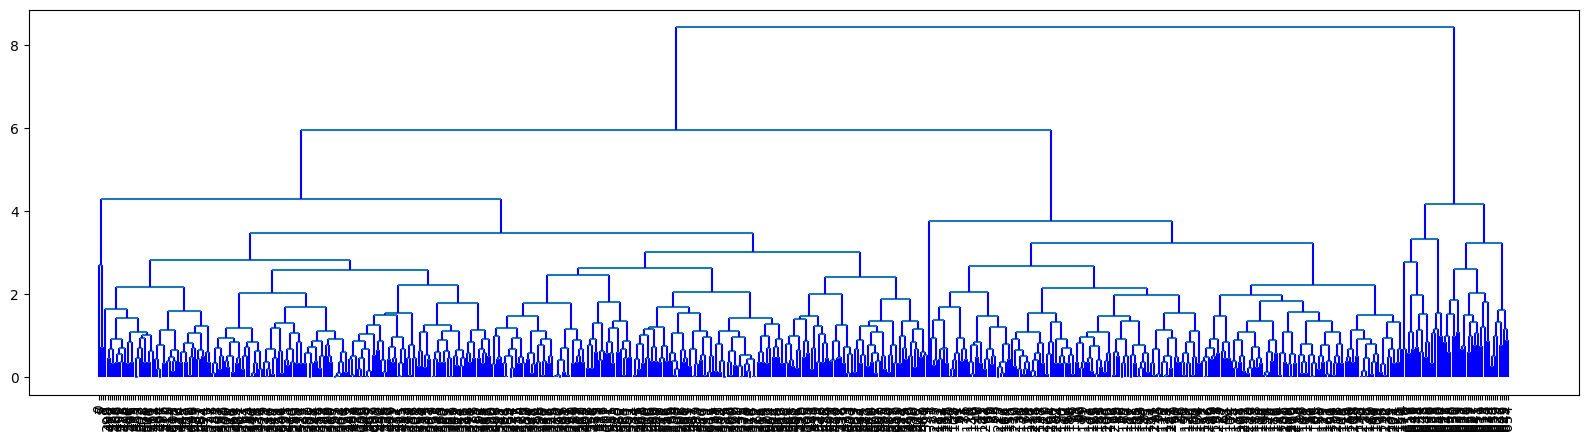

In [40]:
h.draw_dendrogram()

Действительно, здесь четко прослеживаются 3 кластера, именно столько кластеров мы и оставим

Теперь проверим эталонную реализацию

In [42]:
с=standartize_data(custs)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete',compute_distances=True)

In [43]:
start = time.time()
cl=cluster.fit_predict(np.array(c))
end = time.time()

C:\Users\ilabu\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [44]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 11.998176574707031 ms


Построим матрицу сопряженности:

In [45]:
p=pd.crosstab(index = np.array(h.predict(3)), columns = cl)
p.index = ['Cluster 0', 'Cluster 1','Cluster 2']
p.columns = [ 'Cluster 0', 'Cluster 1','Cluster 2']
p

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,388,0,0
Cluster 1,9,0,213
Cluster 2,0,50,0


Результаты практически идентичны

Посмотрим метрики для написанной реализации:

In [46]:
print('Среднее межкластерное расстояние:', h.show_average_between_clusters(3))

Среднее межкластерное расстояние: 6.474273828543971


In [47]:
print('Средние внутрикластерные расстояния:', h.show_average_inside_clusters(3))

Средние внутрикластерные расстояния: [2.3110787590392605, 1.530014398665294, 1.9736801481099981]


Метрики для эталонной реализации:

In [52]:
cl_indexes=[]
dists=np.array([])
for cl_a in np.unique(np.array(cl)):
    cl_indexes.append(np.where(np.array(cl)==cl_a))
for i in range(len(cl_indexes)):
    for j in range(i+1, len(cl_indexes)):
        dists=np.append(dists,max_n_em(cl_indexes,c,i,j))
print('Среднее межкластерное расстояние:', np.mean(dists))

Среднее межкластерное расстояние: 7.4920302619697425


In [53]:
cl_indexes=[]
dists=np.array([])
for cl_a in np.unique(np.array(cl)):
    cl_indexes.append(np.where(np.array(cl)==cl_a)[0])
for cl_a in cl_indexes:
    ds=np.array([])
    for i in range(cl_a.shape[0]):
        for j in range(i+1, cl_a.shape[0]):
            ds=np.append(ds,euclide(c[i],c[j]))
    dists=np.append(dists, np.mean(ds))
print('Средние внутрикластерные расстояния:', dists)  

Средние внутрикластерные расстояния: [2.3241222  1.97368015 1.53283173]


Несмотря на то, что скорость реализации эталонного алгоритма намного выше, чем у написанного, остальные метрики у написанного алгоритма лучше

# EM-кластеризация

Вспомогательные функции:

In [31]:
def max_n_em(A,data, i_1,i_2):#Метод дальнего соседа для расчёта среднего межкластерного расстояния
    m=-1
    for i in A[i_1][0]:
        for j in A[i_2][0]:
            t=euclide(data[i],data[j])
            if m<t:
                m=t
    return m

def standartize_data(data):
    d=(data-data.mean())/data.std()
    return d.to_numpy()

Класс, реализующий EM-кластеризацию:

In [57]:
class EM_clusterer():
    clusts=[]
    f=0#Минимальная схожесть разбиений
    mu_s=np.array([])#Средние кластеров
    matrix_s=np.array([])#Матрицы ковариаций
    w=np.array([])#Вектор весов
    g=np.array([])
    d=np.array([])
    def ro(self, x, m):#Расчёт расстояния от точки до центра кластера
        return np.sum(np.power(x-self.mu_s[m],2)*np.square(self.matrix_s[m]))
    
    def probability(self,x,m):#Расчёт вероятности принадлежности точки к кластеру
        return np.power(2*np.pi, -x.shape[0]/2)*1/np.linalg.det(self.matrix_s[m])*np.exp(-(1/2)*self.ro(x,m))
    
    def init_parameters(self, n_clusters,size):
        self.mu_s=np.random.normal(0,1,size=(n_clusters,size[1]))/5#Инициализация средних
        self.matrix_s=[np.diag(np.ones(size[1])) for i in range(n_clusters)]#Инициализация матрицы ковариаций
        self.g=np.zeros((size[0],n_clusters))#Инициализация матрицы вероятностей
        self.clusts=np.ones(size[0])#Инициализация вектора принадлежности кластерам
        self.w=np.ones(n_clusters)/n_clusters
        
    def fit(self, X, n_clusters, min_match=0.95, max_iters=100):
        self.d=standartize_data(X)
        self.init_parameters(n_clusters, self.d.shape)
        for step in range(max_iters):
        #E-шаг
            for j in range(self.d.shape[0]):
                g_j=np.array([])
                for i in range(n_clusters):
                    g_j=np.append(g_j, self.w[i]*self.probability(self.d[j,:],i))
                self.g[j,:]=g_j/np.sum(g_j)
            groups_new=np.argmax(self.g,axis=1)
            self.f=np.sum(groups_new==self.clusts)/self.clusts.shape[0]
            self.clusts=groups_new
        #M-шаг
            self.w=np.mean(self.g, axis=0)#Обновление весов
            for i in range(n_clusters):
                for j in range(self.d.shape[1]):
                    self.mu_s[i,j]=np.mean(self.g[:,i]*self.d[:,j])/self.w[i] #Обновление средних
            for i in range(n_clusters):
                for j in range(self.d.shape[1]):
                    self.matrix_s[i][j,j]=np.sqrt(np.mean(np.square(self.d[:,j]-self.mu_s[i,j])*self.g[:,i])/self.w[i])#Обновление матрицы ковариаций
            if self.f>min_match:
                break

    def predict_probabilities(self):#Возвращение вероятностей принадлежности точек к кластерам
        return self.g
    
    def predict_strict(self):#Жётский вариант кластеризации
        return self.clusts
    
    def average_between_clusters(self):#Расчёт среднего межкластерного расстояния
        cl_indexes=[]
        dists=np.array([])
        for cl in np.unique(self.clusts):
            cl_indexes.append(np.where(self.clusts==cl))
        for i in range(len(cl_indexes)):
            for j in range(i+1, len(cl_indexes)):
                dists=np.append(dists,max_n_em(cl_indexes,self.d,i,j)) 
        return np.mean(dists)
    def average_inside_clusters(self):#Расчёт среднего внутрикластерного расстояния
        cl_indexes=[]
        dists=np.array([])
        for cl in np.unique(self.clusts):
            cl_indexes.append(np.where(self.clusts==cl)[0])
        for cl in cl_indexes:
            ds=np.array([])
            for i in range(cl.shape[0]):
                for j in range(i+1, cl.shape[0]):
                    ds=np.append(ds,euclide(self.d[i],self.d[j]))
            dists=np.append(dists, np.mean(ds))
        return dists

## Проведение кластеризации на 1 датасете:

In [58]:
em=EM_clusterer()

In [78]:
start = time.time()
em.fit(wine,3, min_match=1)
end = time.time()

In [72]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 2318.0007934570312 ms


Сравним результаты с эталонной реализацией:

In [73]:
from sklearn.mixture import GaussianMixture

In [74]:
X = standartize_data(wine)

In [75]:
start = time.time()
gm = GaussianMixture(n_components=3, random_state=0).fit_predict(X)
end = time.time()

C:\Users\ilabu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 100.99196434020996 ms


Построим таблицу сопряженности результатов:

In [80]:
p=pd.crosstab(index = em.predict_strict(), columns = gm)
p.index = ['Cluster 0', 'Cluster 1', 'Cluster 2']
p.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2']
p

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,48,6,0
Cluster 1,3,45,63
Cluster 2,0,13,0


Как можно заметить, один из кластеров практически совпал, тогда как другие оказались разными. Алгоритм очень зависит от инициализации центров, определяющихся рандомно, поэтому результаты каждый запуск будут отличаться

Найдём средние межкластерные и внутрикластерные расстояния для написанного алгоритма:

In [104]:
print('Средние межкластерные расстояния:', em.average_between_clusters())
print('Средние внутрикластерные расстояния:',em.average_inside_clusters())

Средние межкластерные расстояния: 8.498382176342544
Средние внутрикластерные расстояния: [3.14546168 4.32456618 2.93273935]


Посчитаем эти метрики для эталонной реализации:

In [82]:
cl_indexes=[]
dists=np.array([])
for cl in np.unique(gm):
    cl_indexes.append(np.where(gm==cl))
for i in range(len(cl_indexes)):
      for j in range(i+1, len(cl_indexes)):
            dists=np.append(dists,max_n_em(cl_indexes,X,i,j)) 
print('Среднее межкластерное расстояние:', np.mean(dists))

Среднее межкластерное расстояние: 9.724374970057594


In [83]:
cl_indexes=[]
dists=np.array([])
for cl in np.unique(gm):
    cl_indexes.append(np.where(gm==cl)[0])
for cl in cl_indexes:
    ds=np.array([])
    for i in range(cl.shape[0]):
        for j in range(i+1, cl.shape[0]):
             ds=np.append(ds,euclide(X[i],X[j]))
    dists=np.append(dists, np.mean(ds))
print('Средние внутрикластерные расстояния:', dists)  

Средние внутрикластерные расстояния: [3.17075089 3.45354344 3.42258941]


Именно для данного прогона модели среднее межкластерное расстояние на написанном алгоритме оказалось меньше, чем на эталонном. Средние внутрикластерные расстояния оказались примерно одинаковыми. Время выполнения эталонного алгоритма снова оказалось намного меньше, чем написанного

## Кластеризация 2 датасета:

In [84]:
em_2=EM_clusterer()

In [96]:
start = time.time()
em_2.fit(custs,3, min_match=1)
end = time.time()

In [97]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 8807.732343673706 ms


In [99]:
X = standartize_data(custs)

In [100]:
start = time.time()
gm = GaussianMixture(n_components=3, random_state=0).fit_predict(X)
end = time.time()

C:\Users\ilabu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [101]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 102.99873352050781 ms


In [103]:
p=pd.crosstab(index = em_2.predict_strict(), columns = gm)
p.index = ['Cluster 0', 'Cluster 1', 'Cluster 2']
p.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2']
p

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,0,221,0
Cluster 1,386,3,1
Cluster 2,0,0,49


В данном случае разбиения практически идентичны. Посчитаем остальные метрики:

In [105]:
print('Средние межкластерные расстояния:', em_2.average_between_clusters())
print('Средние внутрикластерные расстояния:',em_2.average_inside_clusters())

Средние межкластерные расстояния: 7.4920302619697425
Средние внутрикластерные расстояния: [1.53127175 2.3127098  1.98613895]


Метрики для эталонной реализации:

In [106]:
cl_indexes=[]
dists=np.array([])
for cl in np.unique(gm):
    cl_indexes.append(np.where(gm==cl))
for i in range(len(cl_indexes)):
      for j in range(i+1, len(cl_indexes)):
            dists=np.append(dists,max_n_em(cl_indexes,X,i,j)) 
print('Среднее межкластерное расстояние:', np.mean(dists))

Среднее межкластерное расстояние: 7.4920302619697425


In [107]:
cl_indexes=[]
dists=np.array([])
for cl in np.unique(gm):
    cl_indexes.append(np.where(gm==cl)[0])
for cl in cl_indexes:
    ds=np.array([])
    for i in range(cl.shape[0]):
        for j in range(i+1, cl.shape[0]):
             ds=np.append(ds,euclide(X[i],X[j]))
    dists=np.append(dists, np.mean(ds))
print('Средние внутрикластерные расстояния:', dists) 

Средние внутрикластерные расстояния: [2.31190597 1.53281042 1.97368015]


Средние расстояния в данном случае практически не отличаются, но время отработки эталонного алгоритма снова сильно меньше, чем у написанного

# DBSCAN

Вспомогательные функции:

In [22]:
def standartize_data(data):
    d=(data-data.mean())/data.std()
    return d.to_numpy()

def make_matrix(d):#Создание матрицы расстояний
    A=np.diag(np.ones(d.shape[0])*np.inf)
    for i in range(d.shape[0]):
        for j in range(i+1, d.shape[0]):
                A[i,j]=euclide(d[i],d[j])
                A[j,i]=A[i,j]
    return A

def remake_matrix(A,cl):#Пересчёт матрицы расстояний при изменении кластерного состава
    for i in cl:
        A[cl,:],A[:,cl]=np.inf,np.inf
    return A

Класс, реализующий кластеризацию:

In [23]:
class DBSCAN_clusterer():
    dic={}
    predictions=[]
    def init_dict(self,d):
        for i in range(d.shape[0]):
            self.dic[i]=[0,0]
            
    def fit_predict(self,data, eps, m):#Обучение и предсказание
        d=standartize_data(data)#Стандарта=изация данных
        self.init_dict(d)#Создание словаря "Объект:[кластер, тип точки]"
        U=np.arange(d.shape[0])#Создание множества U
        A=make_matrix(d)#Создание матрицы расстояний
        clusters_count=0
        while len(U)>0:#Пока U непустое
            Ux=np.where(A[U[0]]<eps)[0]#Поиск всех точек в eps-окрестности
            if len(Ux)>=m:#Если таких точек больше, чем m
                cl=np.array([U[0]])#Создание кластера
                self.dic.get(U[0])[0],self.dic.get(U[0])[1]=clusters_count,2#Обновление словаря
                while len(Ux)>0:#Бежим по всем граничным точкам
                    el=Ux[0]
                    cl=np.append(cl,el)#Добавление точки в кластер
                    Ux=np.delete(Ux,0)#Её удаление из граничных
                    Ut=np.where(A[el]<eps)[0]#РАсчёт eps-окрестности
                    if len(Ut)>=m:#Если точек больше, чем m, то это корневая точка
                        self.dic.get(el)[0],self.dic.get(el)[1]=clusters_count,2
                        Ux=np.unique(np.append(Ux,Ut))#Пополняем массив граничных точек
                        indices=np.argwhere(np.isin(Ux,cl))
                        Ux=np.delete(Ux,indices)#Избавление от дубликатов
                    else:#Если нет, то оставляем граничной
                        self.dic.get(el)[0],self.dic.get(el)[1]=clusters_count,1
                U=np.delete(U,np.argwhere(np.isin(U,cl)))#Удаление из множества непомеченных точек всех из кластера
                A=remake_matrix(A,cl.astype(int))#Пересчитываем матрицу расстояний, удаляя все точки из кластера
                clusters_count+=1
            else:#Если это шумовая точка
                self.dic.get(U[0])[0]=-1
                U=np.delete(U,0)#Удаление из множества непомеченных точек
        self.predictions=[self.dic.get(i)[0] for i in range(len(self.dic.keys()))]
        return self.predictions
    def show_object_types(self):#Возвращаем типа точек
        tps=[]
        for i in range(len(self.dic.keys())):
            if self.dic.get(i)[1]==0:
                tps.append('Outlier')
            elif self.dic.get(i)[1]==1:
                tps.append('Non-core')
            else: tps.append('Core')
        return tps
    def average_between_clusters(self,data):#Расчёт среднего межкластерного расстояния
        cl_indexes=[]
        dists=np.array([])
        for cl in np.unique(np.array(self.predictions)):
            cl_indexes.append(np.where(np.array(self.predictions)==cl))
        for i in range(len(cl_indexes)):
            for j in range(i+1, len(cl_indexes)):
                dists=np.append(dists,max_n_em(cl_indexes,standartize_data(data),i,j)) 
        return np.mean(dists)
    def average_inside_clusters(self,data):#Расчёт среднего внутрикластерного расстояния
        cl_indexes=[]
        dists=np.array([])
        for cl in np.unique(np.array(self.predictions)):
            cl_indexes.append(np.where(np.array(self.predictions)==cl)[0])
        for cl in cl_indexes:
            ds=np.array([])
            for i in range(cl.shape[0]):
                for j in range(i+1, cl.shape[0]):
                    ds=np.append(ds,euclide(standartize_data(data)[i],standartize_data(data)[j]))
            dists=np.append(dists, np.mean(ds))
        return dists[1:]

## Применение DBSCAN для 1 датасета

In [24]:
db=DBSCAN_clusterer()

In [25]:
start = time.time()
a=db.fit_predict(wine, 2, 2)
end = time.time()

In [26]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 154.62851524353027 ms


Сравним  результаты с эталонной реализацией:

In [27]:
from sklearn.cluster import DBSCAN
X = standartize_data(wine)

In [28]:
start = time.time()
clustering = DBSCAN(eps=2, min_samples=2).fit(X)
end = time.time()

In [29]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 13.99993896484375 ms


In [32]:
print('Среднее межкластерное расстояние:', db.average_between_clusters(wine))
print('Средние внутрикластерные расстояния:',db.average_inside_clusters(wine))

Среднее межкластерное расстояние: 6.761229889543758
Средние внутрикластерные расстояния: [3.93939266 3.41484125 3.06570367 3.66845665 3.66845665]


Среднее межкластерное расстояние для эталонной реализации:

In [33]:
cl_indexes=[]
dists=np.array([])
for cl in np.unique(clustering.labels_):
    cl_indexes.append(np.where(clustering.labels_==cl))
for i in range(len(cl_indexes)):
      for j in range(i+1, len(cl_indexes)):
            dists=np.append(dists,max_n_em(cl_indexes,X,i,j)) 
print('Среднее межкластерное расстояние:', np.mean(dists))

Среднее межкластерное расстояние: 6.484571209677369


Среднее внутрикластерное расстояние для эталонной реализации:

In [34]:
cl_indexes=[]
dists=np.array([])
for cl in np.unique(np.array(clustering.labels_)):
    cl_indexes.append(np.where(np.array(clustering.labels_)==cl)[0])
for cl in cl_indexes:
    ds=np.array([])
    for i in range(cl.shape[0]):
        for j in range(i+1, cl.shape[0]):
            ds=np.append(ds,euclide(standartize_data(wine)[i],standartize_data(wine)[j]))
    dists=np.append(dists, np.mean(ds))
print('Средние внутрикластерные расстояния:', dists[1:])  

Средние внутрикластерные расстояния: [3.93939266 3.48769685 3.48769685 3.48769685 3.41484125 3.06570367
 3.66845665 3.66845665 3.48769685]


In [35]:
p=pd.crosstab(index = np.array(a), columns = clustering.labels_)
p.index = ['Outliers', 'Class 0', 'Class 1','Class 2','Class 3','Class 4']
p.columns = ['Outliers', 'Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8']
p

,Outliers,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8
Outliers,56,0,2,2,2,0,0,0,0,2
Class 0,0,78,0,0,0,0,0,0,0,0
Class 1,0,0,0,0,0,6,0,0,0,0
Class 2,0,0,0,0,0,0,20,0,0,0
Class 3,0,0,0,0,0,0,0,5,0,0
Class 4,0,0,0,0,0,0,0,0,5,0


Большинство кластеров совпало друг с другом, однако в эталонной реализации было выделено 6 небольших кластеров, помеченных в написанной реализации выбросами, что сказалось на остальных метриках

## Применение DBSCAN для 2 датасета

In [81]:
db2=DBSCAN_clusterer()

In [82]:
start = time.time()
res=db2.fit_predict(custs, 0.9, 2)
end = time.time()

In [83]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 2191.072463989258 ms


In [84]:
print('Среднее межкластерное расстояние:', db2.average_between_clusters(custs))
print('Средние внутрикластерные расстояния:',db2.average_inside_clusters(custs))

Среднее межкластерное расстояние: 5.372665981603479


KeyboardInterrupt: 

Сравнение с эталонной реализацией

In [85]:
X = standartize_data(custs)

In [86]:
start = time.time()
clustering = DBSCAN(eps=0.9, min_samples=2).fit(X)
end = time.time()

In [87]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 11.030912399291992 ms


In [92]:
p=pd.crosstab(index = np.array(res), columns = clustering.labels_)
p.index = ['Outliers', 'Class 0', 'Class 1','Class 2','Class 3','Class 4']
p.columns = ['Outliers', 'Class 0', 'Class 1','Class 2','Class 3','Class 4']
p

,Outliers,Class 0,Class 1,Class 2,Class 3,Class 4
Outliers,7,0,0,0,0,0
Class 0,0,608,0,0,0,0
Class 1,0,0,3,0,0,0
Class 2,0,0,0,26,0,0
Class 3,0,0,0,0,12,0
Class 4,0,0,0,0,0,4


В данном случае результаты полностью сошлись. Однако, данный датасет не подходит для кластеризации методом DBSCAN, поскольку один из кластеров сильно менее плотный, нежели другие, что играет важнейшую роль в этом случае. Поэтому кластеры получились крайне неравномерными. Время эталонной реализации снова сильно меньше, нежели написанной

In [ ]:
import wget
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240226121023/GFG.pdf'


file_Path = 'research_Paper_3.p